In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_wine, load_breast_cancer
from matplotlib import pyplot as plt

#DATASET WINE
wine = load_wine()
wine_df = pd.DataFrame(wine.data)
wine_df['class'] = load_wine()['target']
print("DATASET WINE")
print("Attribute: ", wine.feature_names)
print("Class: ", wine.target_names)
print("Dataset: ")
display(wine_df.head())
print("=====================================================================================")
print(" ")

#DATASET PIMA INDIAN DIABETES
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/Ragnora/KecerdasanKomputasional/main/diabetes.csv')
print('DATASET PIMA INDIAN DIABETES')
print('Attribute: ', diabetes_df.columns)
print('Class: ', diabetes_df.iloc[:,-1].unique())
print("Dataset: ")
display(diabetes_df.head())
print("=====================================================================================")
print(" ")

#DATASET BREAST CANCER
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data)
cancer_df['class'] = load_breast_cancer()['target']
print("DATASET BREAST CANCER")
print("Attribute: ", cancer.feature_names)
print("Class: ", cancer.target_names)
print("Dataset: ")
display(cancer_df.head())

DATASET WINE
Attribute:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class:  ['class_0' 'class_1' 'class_2']
Dataset: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


 
DATASET PIMA INDIAN DIABETES
Attribute:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Class:  [1 0]
Dataset: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 
DATASET BREAST CANCER
Attribute:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class:  ['malignant' 'benign']
Dataset: 


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**WINE DATASET 20%, 30%, 40%**

Dataset Test 20%
|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.29
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.29
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- feature_10 <= 1.28
|   |   |   |--- class: 0
|   |   |--- feature_10 >  1.28
|   |   |   |--- class: 1



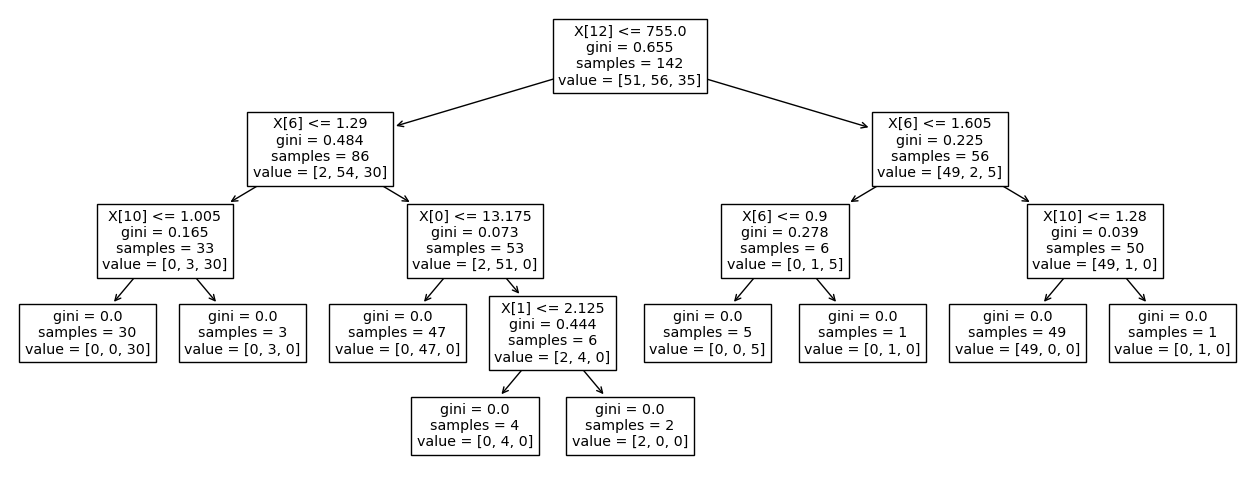

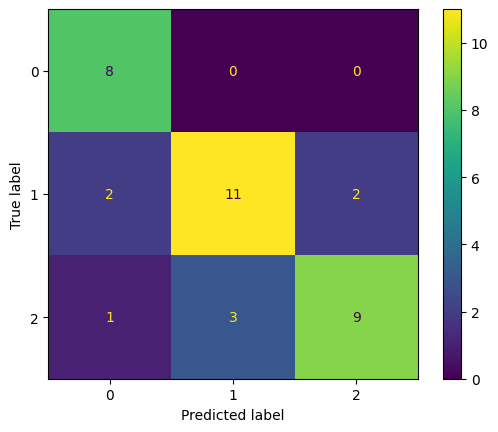

Akurasi:  0.7777777777777778 %

Dataset Test 30%
|--- feature_12 <= 755.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  755.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- feature_10 <= 1.28
|   |   |   |--- class: 0
|   |   |--- feature_10 >  1.28
|   |   |   |--- class: 1



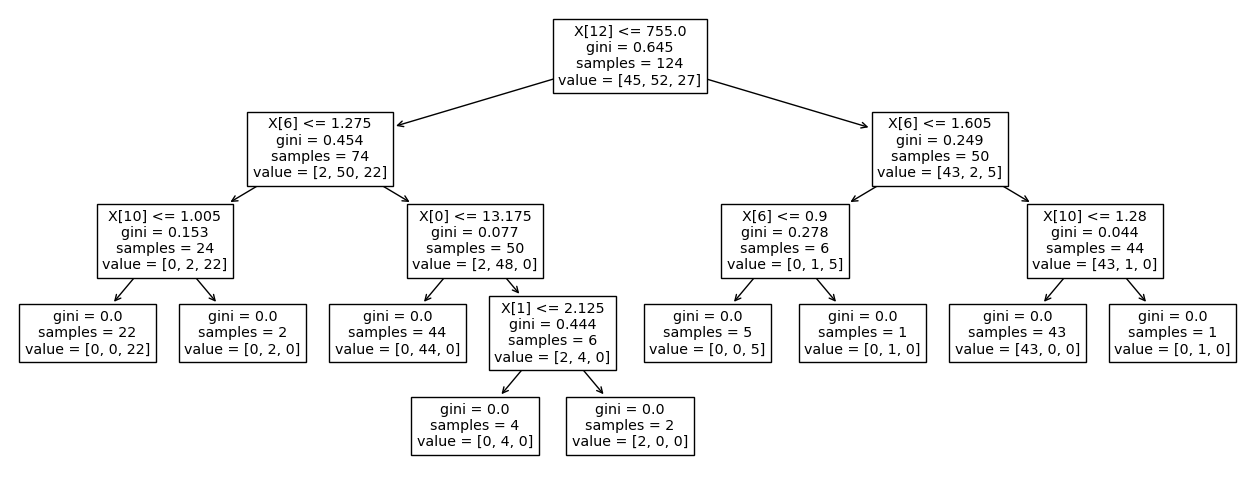

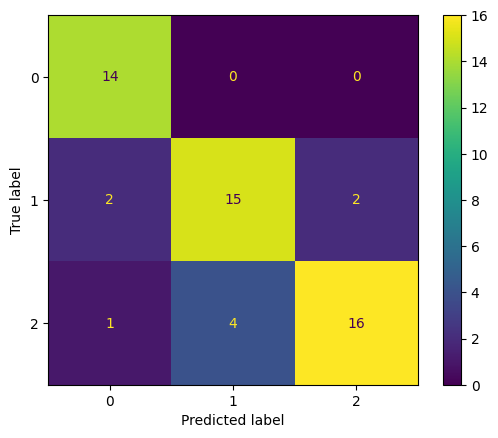

Akurasi:  0.8333333333333334 %

Dataset Test 40%
|--- feature_12 <= 760.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  760.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- class: 0



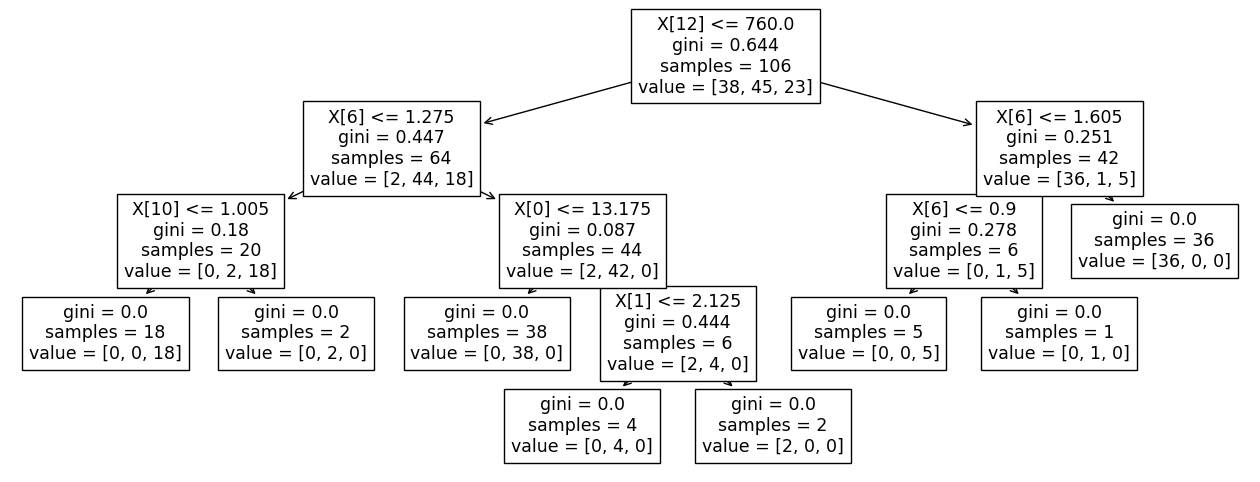

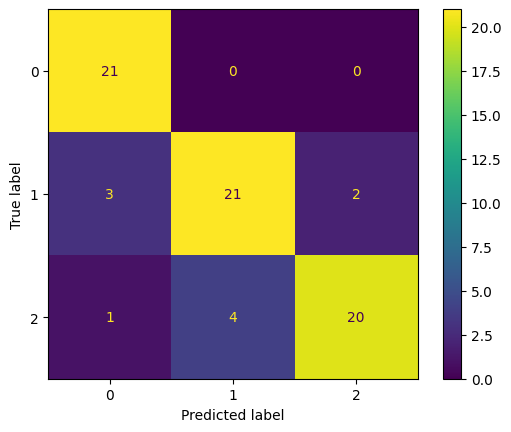

Akurasi:  0.8611111111111112 %


In [2]:
#memisahkan attribute (X) dan class (Y)
X = wine_df.iloc[:, :-1]
Y = wine_df.iloc[:, -1]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=.2, random_state=100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=.3, random_state=100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=.4, random_state=100)

#dataset test 20%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train1, Y_train1)
print('Dataset Test 20%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred1 = classifier_mode1.predict(X_test1)
ConfusionMatrixDisplay.from_predictions(Y_test1, Y_pred1)
plt.show()
print('Akurasi: ', accuracy_score(Y_test1, Y_pred1), '%')
print("=====================================================================================")
print("")

#dataset test 30%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train2, Y_train2)
print('Dataset Test 30%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred2 = classifier_mode1.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(Y_test2, Y_pred2)
plt.show()
print('Akurasi: ', accuracy_score(Y_test2, Y_pred2), '%')
print("=====================================================================================")
print("")

#dataset test 40%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train3, Y_train3)
print('Dataset Test 40%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred3 = classifier_mode1.predict(X_test3)
ConfusionMatrixDisplay.from_predictions(Y_test3, Y_pred3)
plt.show()
print('Akurasi: ', accuracy_score(Y_test3, Y_pred3), '%')

**PRIMA INDIAN DIABETES DATASET 20%, 30%, 40%**

Dataset Test 20%
|--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |--- feature_4 <= 9.00
|   |   |   |   |   |   |   |--- feature_1 <= 111.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 40.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  40.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  111.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 34.65
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  34.65
|   |   |   |   |   |   |   | 

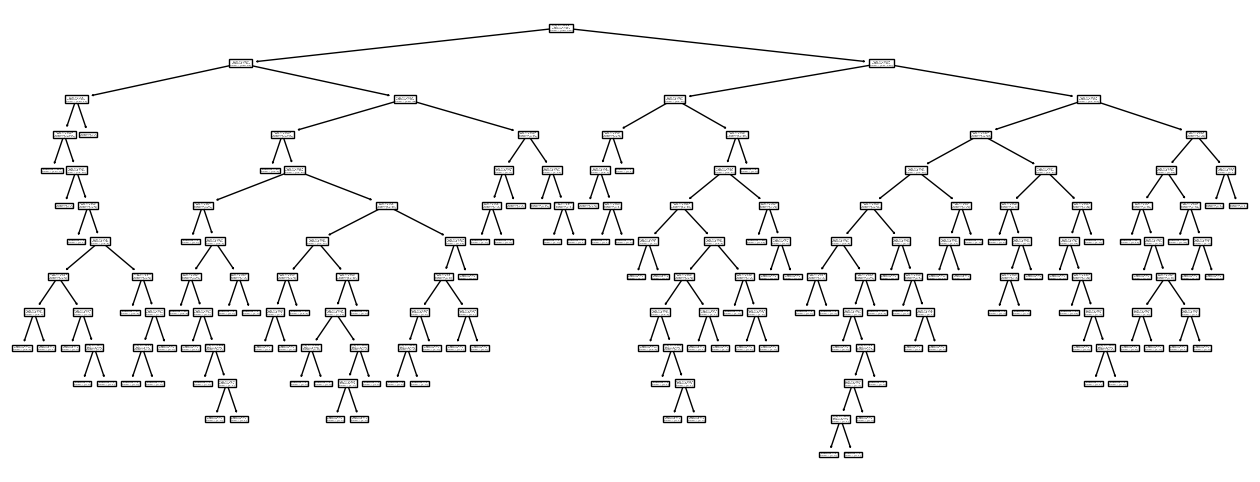

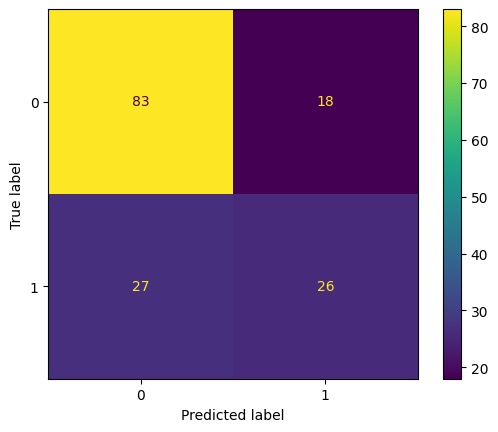

Akurasi:  0.7077922077922078 %

Dataset Test 30%
|--- feature_1 <= 123.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 49.10
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- feature_5 <= 30.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  30.95
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 31.80
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  31.80
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   | 

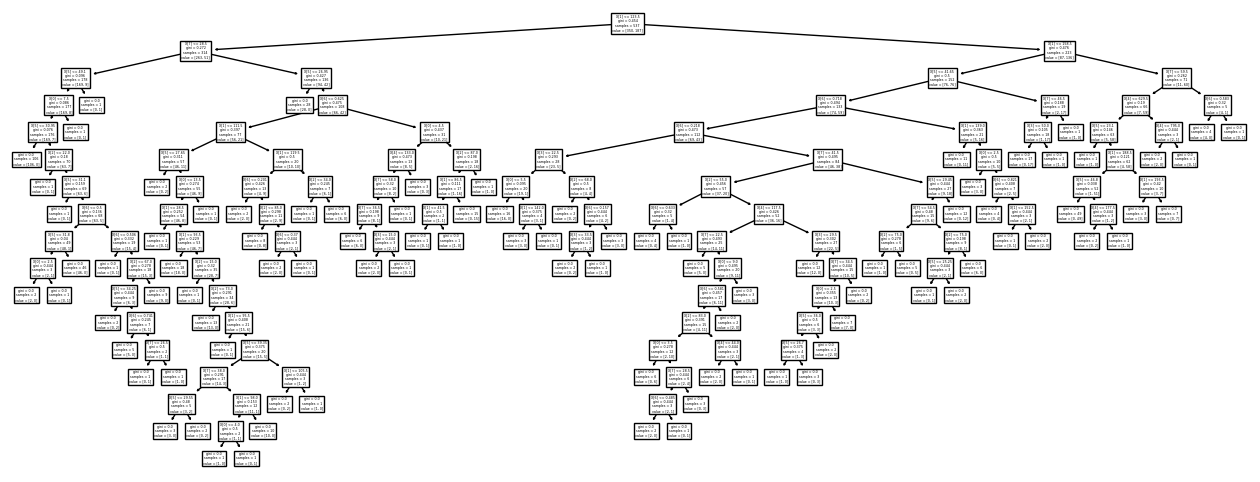

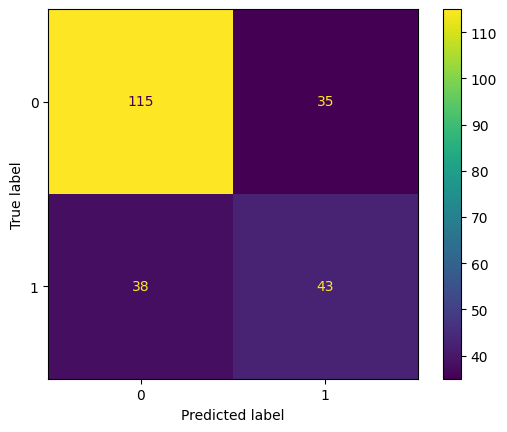

Akurasi:  0.683982683982684 %

Dataset Test 40%
|--- feature_1 <= 127.50
|   |--- feature_7 <= 32.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.30
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  31.30
|   |   |   |   |   |   |   |--- feature_5 <= 49.05
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  49.05
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_5 <= 34.05
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  34.05
|   |   |   |   |   |   |   |--- feature_4 <= 2

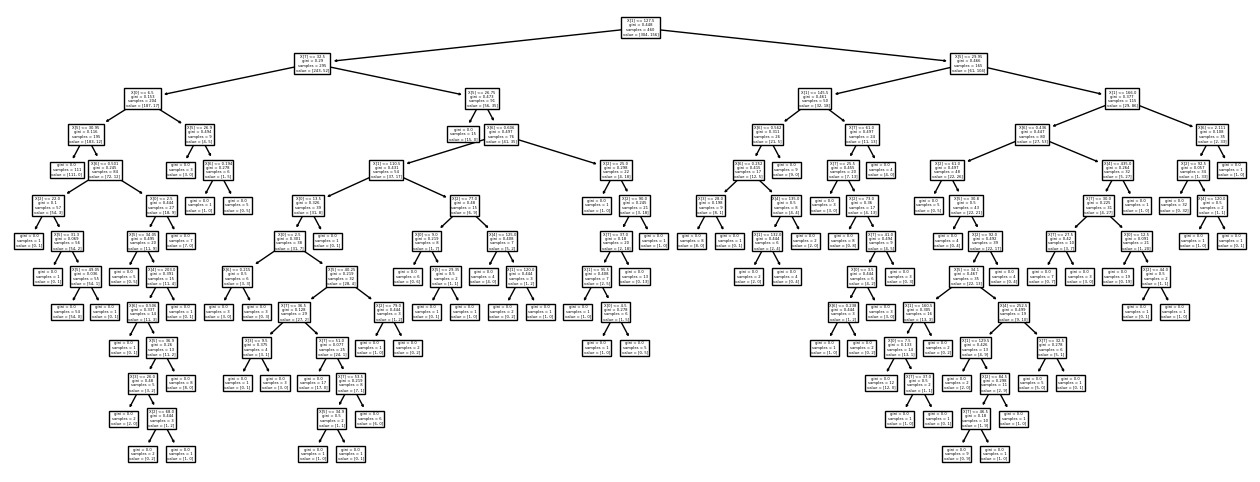

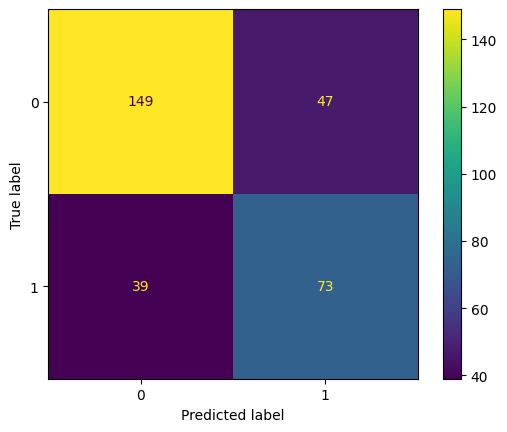

Akurasi:  0.7207792207792207 %


In [3]:
#memisahkan attribute (X) dan class (Y)
X = diabetes_df.iloc[:, :-1]
Y = diabetes_df.iloc[:, -1]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=.2, random_state=100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=.3, random_state=100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=.4, random_state=100)

#dataset test 20%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train1, Y_train1)
print('Dataset Test 20%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred1 = classifier_mode1.predict(X_test1)
ConfusionMatrixDisplay.from_predictions(Y_test1, Y_pred1)
plt.show()
print('Akurasi: ', accuracy_score(Y_test1, Y_pred1), '%')
print("=====================================================================================")
print("")

#dataset test 30%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train2, Y_train2)
print('Dataset Test 30%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred2 = classifier_mode1.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(Y_test2, Y_pred2)
plt.show()
print('Akurasi: ', accuracy_score(Y_test2, Y_pred2), '%')
print("=====================================================================================")
print("")

#dataset test 40%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train3, Y_train3)
print('Dataset Test 40%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred3 = classifier_mode1.predict(X_test3)
ConfusionMatrixDisplay.from_predictions(Y_test3, Y_pred3)
plt.show()
print('Akurasi: ', accuracy_score(Y_test3, Y_pred3), '%')

**BREAST CANCER DATASET 20%, 30%, 40%**

Dataset Test 20%
|--- feature_27 <= 0.15
|   |--- feature_23 <= 957.45
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_13 <= 36.47
|   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  36.47
|   |   |   |   |--- feature_1 <= 21.43
|   |   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  21.43
|   |   |   |   |   |--- feature_7 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.03
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_1 <= 20.94
|   |   |   |   |--- feature_23 <= 810.30
|   |   |   |   |   |--- 

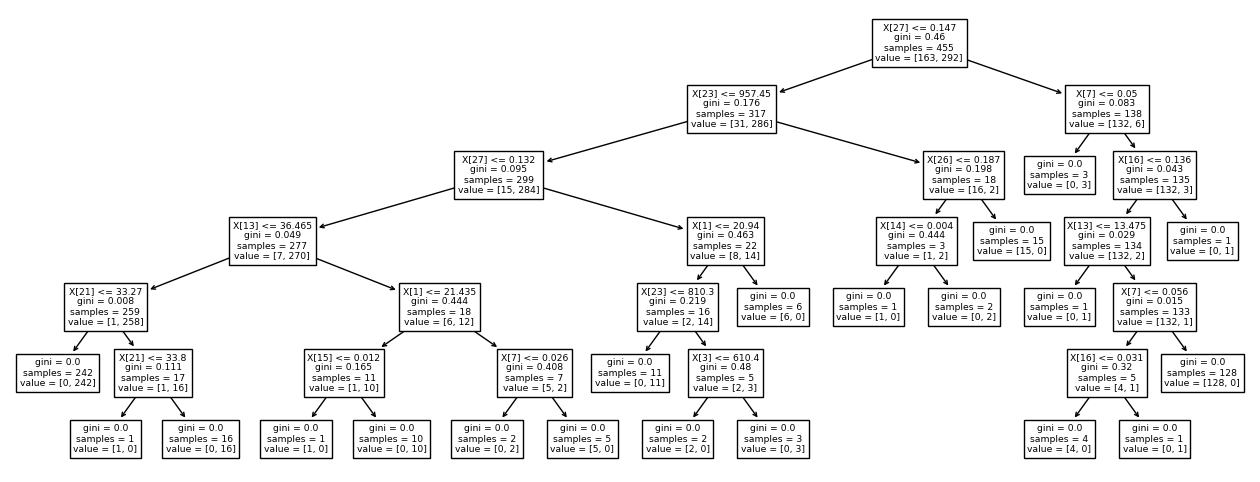

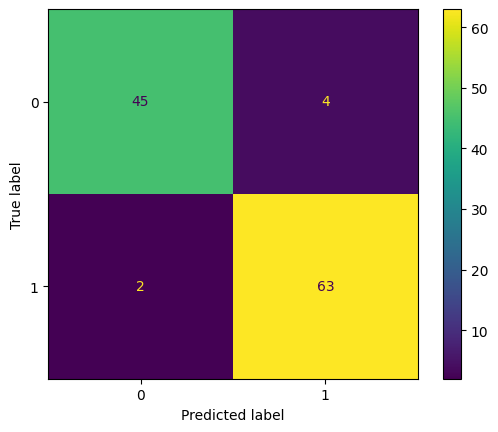

Akurasi:  0.9473684210526315 %

Dataset Test 30%
|--- feature_27 <= 0.14
|   |--- feature_3 <= 696.25
|   |   |--- feature_27 <= 0.12
|   |   |   |--- feature_10 <= 0.63
|   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.63
|   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.12
|   |   |   |--- feature_9 <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  0.06
|   |   |   |   |--- feature_18 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_18 >  0.01
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_10 

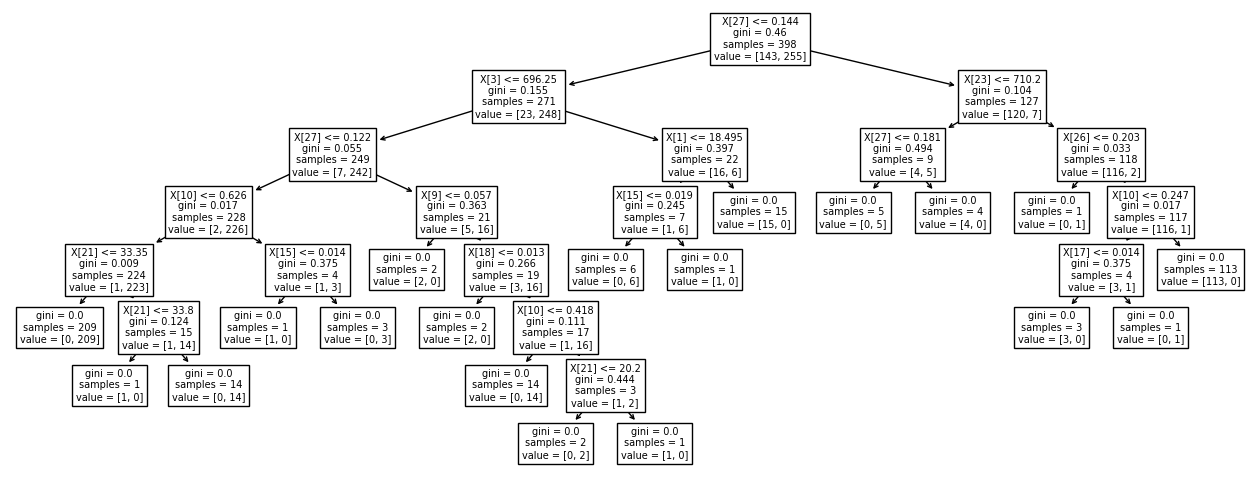

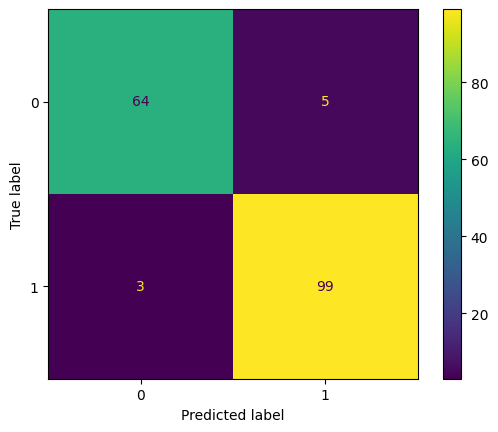

Akurasi:  0.9532163742690059 %

Dataset Test 40%
|--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: 1
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_23 <= 710.20
|   |   |--- feature_27 <= 

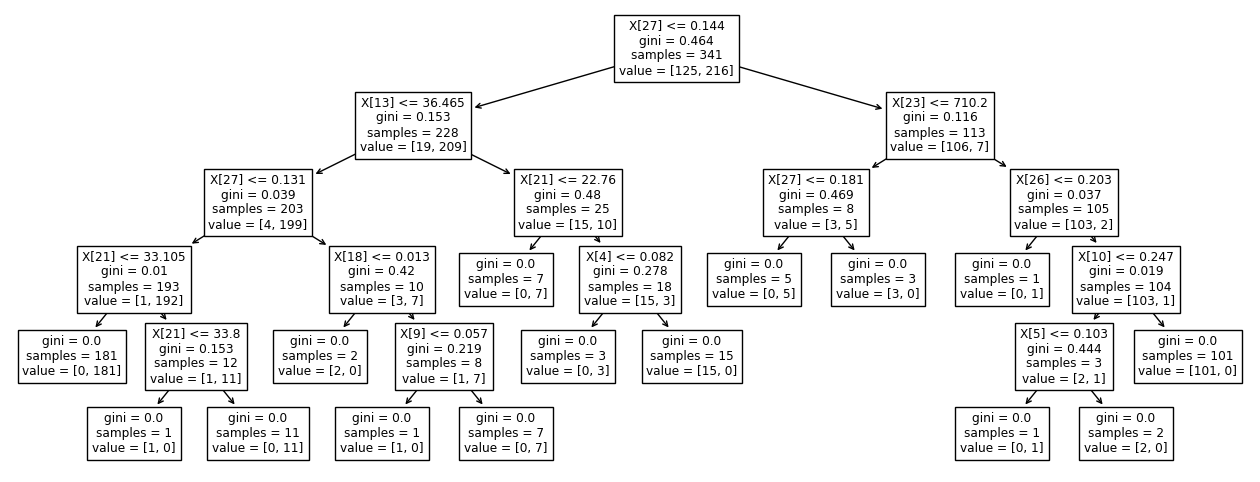

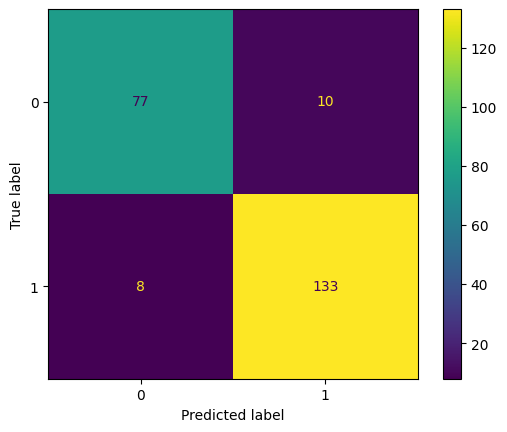

Akurasi:  0.9210526315789473 %


In [4]:
#memisahkan attribute (X) dan class (Y)
X = cancer_df.iloc[:, :-1]
Y = cancer_df.iloc[:, -1]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=.2, random_state=100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=.3, random_state=100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=.4, random_state=100)

#dataset test 20%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train1, Y_train1)
print('Dataset Test 20%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred1 = classifier_mode1.predict(X_test1)
ConfusionMatrixDisplay.from_predictions(Y_test1, Y_pred1)
plt.show()
print('Akurasi: ', accuracy_score(Y_test1, Y_pred1), '%')
print("=====================================================================================")
print("")

#dataset test 30%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train2, Y_train2)
print('Dataset Test 30%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred2 = classifier_mode1.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(Y_test2, Y_pred2)
plt.show()
print('Akurasi: ', accuracy_score(Y_test2, Y_pred2), '%')
print("=====================================================================================")
print("")

#dataset test 40%
classifier_mode1 = DecisionTreeClassifier(random_state=100)
classifier_mode1.fit(X_train3, Y_train3)
print('Dataset Test 40%')
print(export_text(classifier_mode1))
plt.figure(figsize=(16, 6))
plot_tree(classifier_mode1)
Y_pred3 = classifier_mode1.predict(X_test3)
ConfusionMatrixDisplay.from_predictions(Y_test3, Y_pred3)
plt.show()
print('Akurasi: ', accuracy_score(Y_test3, Y_pred3), '%')